In [1]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import imutils
import json

In [2]:
HEIGHT = 137
WIDTH = 236

In [3]:
def image_crop(img):
    img = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY)[1]
    inv_img = cv2.bitwise_not(img)
    im_blr = cv2.blur(inv_img, (40, 40))
    im_blr = cv2.GaussianBlur(im_blr, (5, 5), 0)

    thresh = cv2.threshold(im_blr, 30, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, 
                                           method=cv2.CHAIN_APPROX_SIMPLE)
    contours = cnts[0]
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    square_left_top = (extLeft[0], extTop[1])
    square_right_bot = (extRight[0], extBot[1])

    inv_img = inv_img[square_left_top[1]:square_right_bot[1], square_left_top[0]:square_right_bot[0]]

    cont_img = np.zeros(img.shape)
    cv2.drawContours(image=cont_img, contours=contours, 
                     contourIdx=-1, color=(255, 255, 255), thickness=2, 
                     lineType=cv2.LINE_AA)

    out_img = np.zeros((max(inv_img.shape), max(inv_img.shape)))

    if inv_img.shape[0] == out_img.shape[0]:
        devi = out_img.shape[1] - inv_img.shape[1]
        out_img[0:, devi//2:(out_img.shape[1]-(devi - devi//2))] = inv_img     
    elif inv_img.shape[1] == out_img.shape[1]:
        devi = out_img.shape[0] - inv_img.shape[0]
        out_img[devi//2:(out_img.shape[1]-(devi - devi//2)), 0:] = inv_img 

    out_img = cv2.resize(out_img, (224, 224), interpolation = cv2.INTER_AREA)
    out_img = cv2.threshold(out_img, 45, 255, cv2.THRESH_BINARY)[1]
    # print(np.unique(out_img))
    out_img = 255 - out_img
    
    return out_img.astype(np.uint8)


In [4]:
components = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']

par_path = '/Users/imrankabir/Desktop/research/bengali_ocr_app/bengaliai-cv19'
train_df_ = pd.read_csv(os.path.join(par_path, 'train.csv'))
for i in range(4):
    train_df = pd.merge(pd.read_parquet(os.path.join(par_path, f'train_image_data_{i}.parquet')), train_df_, on='image_id')
    output_path = os.path.join(par_path, 'train_images')
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for idx in tqdm(range(len(train_df.iloc[:]))):
        image = train_df.iloc[idx][1:32333]
        image = np.array(image).astype(np.uint8)
        image = image.reshape((HEIGHT, WIDTH))
        out_image = image_crop(image)

        save_image_path = os.path.join(output_path, f'{train_df.iloc[idx][0]}.png')
        cv2.imwrite(save_image_path, out_image)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50210/50210 [16:11<00:00, 51.69it/s]


In [10]:
# image = train_df.iloc[24271][1:32333]
# image = np.array(image).astype(np.uint8)

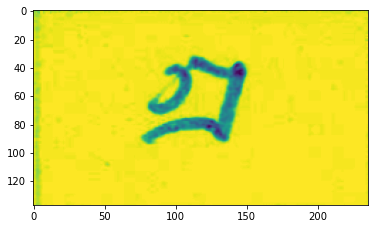

In [11]:
# image = image.reshape((HEIGHT, WIDTH))
# plt.imshow(image)

In [17]:
# train_df.iloc[24271][0]

'Train_174901'

In [6]:
components = ['consonant_diacritic', 'grapheme_root', 'vowel_diacritic']

par_path = '/Users/imrankabir/Desktop/research/bengali_ocr_app/bengaliai-cv19'
train_m_df_ = pd.read_csv(os.path.join(par_path, 'train_multi_diacritics.csv'))
for i in range(4):
    train_m_df = pd.merge(pd.read_parquet(os.path.join(par_path, f'train_image_data_{i}.parquet')), train_m_df_, on='image_id')
    output_path = os.path.join(par_path, 'train_m_images')
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for idx in tqdm(range(len(train_m_df.iloc[:]))):
        image = train_m_df.iloc[idx][1:32333]
        image = np.array(image).astype(np.uint8)
        image = image.reshape((HEIGHT, WIDTH))
        out_image = image_crop(image)

        save_image_path = os.path.join(output_path, f'{train_m_df.iloc[idx][0]}.png')
        cv2.imwrite(save_image_path, out_image)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 124/124 [00:01<00:00, 77.08it/s]


In [35]:
# image = train_m_df.iloc[0][1:32333]
# image = np.array(image).astype(np.uint8)

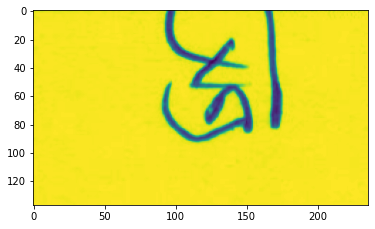

In [36]:
# image = image.reshape((HEIGHT, WIDTH))
# plt.imshow(image)

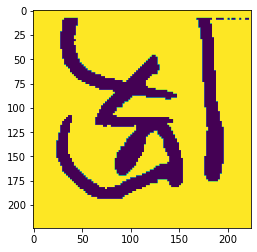

In [37]:
# plt.imshow(image_crop(image))

In [24]:
# len(test_df.iloc[:])

9

In [3]:
par_path = '/Users/imrankabir/Desktop/research/bengali_ocr_app/bengaliai-cv19'
train_df_ = pd.read_csv(os.path.join(par_path, 'train.csv'))
train_m_df_ = pd.read_csv(os.path.join(par_path, 'train_multi_diacritics.csv'))

# df = pd.concat([train_df_, train_m_df_], axis=0, join='inner')
df = train_df_
df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [4]:
dictionary = {}
train_indices_count = int(len(df.iloc[:])*0.9)
train_indices_selector = random.sample(range(0, len(df.iloc[:])-1), train_indices_count)
train_indices = []
val_indices = []
for idx in tqdm(range(len(df.iloc[:]))):
    if idx in train_indices_selector:
        train_indices.append(df.iloc[idx][0])
    else:
        val_indices.append(df.iloc[idx][0])
    t_d = {
        'grapheme': df.iloc[idx][4],
        'components': {
            'c': f'{df.iloc[idx][3]}',
            'r': f'{df.iloc[idx][1]}',
            'v': f'{df.iloc[idx][2]}'
        }
    }
    dictionary[df.iloc[idx][0]] = t_d



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200840/200840 [03:33<00:00, 942.42it/s]


In [5]:
print(len(list(dictionary.keys())))
print(len(train_indices))
print(len(val_indices))

200840
180756
20084


In [6]:
with open('train_indices.txt', 'w') as f:
    f.write(','.join(train_indices))
    
with open('val_indices.txt', 'w') as f:
    f.write(','.join(val_indices))
    
with open('train.json', 'w') as fp:
    json.dump(dictionary, fp)